In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, utils, models
from tensorflow.keras.datasets import mnist

In [19]:
(xtrain,_), (xtest,_) = mnist.load_data()
xtrain.shape

(60000, 28, 28)

In [20]:
xtrainS = xtrain.astype('float32') / 255.
xtestS = xtest.astype('float32') / 255.

xtrainS = np.reshape(xtrainS,(len(xtrainS),28,28,1))
xtestS = np.reshape(xtestS,(len(xtestS),28,28,1))

In [21]:
nf = 0.5
xtrainN=xtrainS+nf*np.random.normal(loc=0.0,scale=1.0,size=xtrainS.shape)
xtestN=xtestS+nf*np.random.normal(loc=0.0,scale=1.0,size=xtestS.shape)

In [22]:
xtrainN = np.clip(xtrainN, 0., 1.)
xtestN = np.clip(xtestN, 0., 1.)

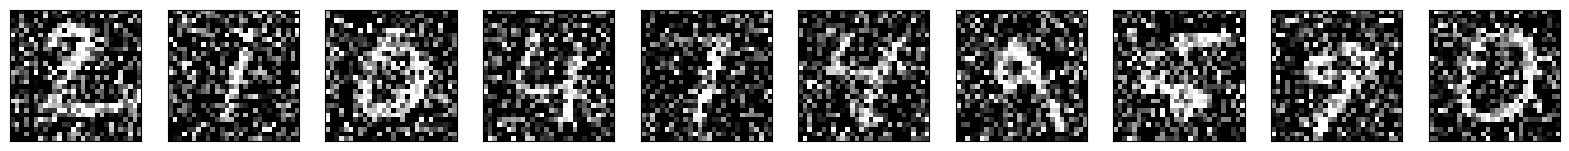

In [23]:
n = 10
plt.figure(figsize=(20,2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(xtestN[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
inp_img=keras.Input(shape=(28,28,1))

x=layers.Conv2D(16,(3,3),activation='relu',padding='same')(inp_img)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
encoder=layers.MaxPooling2D((2,2),padding='same')(x)

x=layers.Conv2D(8,(3,3),activation='relu',padding='same')(encoder)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(16,(3,3),activation='relu')(x)
x=layers.UpSampling2D((2,2))(x)
decoder=layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

model=keras.Model(inp_img,decoder)

In [35]:
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,157 (51.40 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,772 (34.27 KB)

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [27]:
model.fit(xtrainN,xtrainS,epochs=50,batch_size=128,shuffle=True,validation_data=(xtestN,xtestS))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 144ms/step - loss: 0.3031 - val_loss: 0.1818
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 136ms/step - loss: 0.1754 - val_loss: 0.1601
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 129ms/step - loss: 0.1591 - val_loss: 0.1521
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 133ms/step - loss: 0.1521 - val_loss: 0.1473
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 129ms/step - loss: 0.1474 - val_loss: 0.1431
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 133ms/step - loss: 0.1442 - val_loss: 0.1412
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - loss: 0.1417 - val_loss: 0.1386
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - loss: 0.1394 - val_loss: 0.1368
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - loss: 0.1379 - val_loss: 0.1394
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - loss: 0.1360 - val_loss: 0.1330
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 129ms/step - loss: 0.1345 - val_loss: 0.1324
Epoch 12/50
469/469

In [29]:
metrics=pd.DataFrame(model.history.history)

Text(0.5, 1.0, 'Training Loss vs. Validation Loss\nGOKUL M(212222230037)')

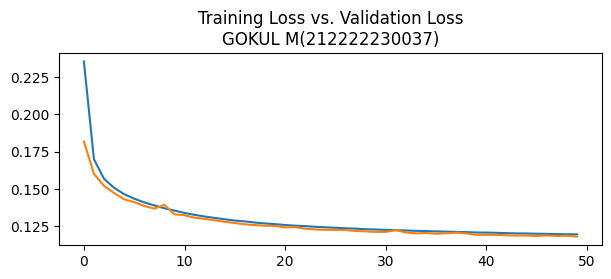

In [31]:
plt.figure(figsize=(7,2.5))
plt.plot(metrics['loss'], label='Training Loss')
plt.plot(metrics['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss\nGOKUL M(212222230037)')

In [32]:
decodeimg=model.predict(xtestN)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


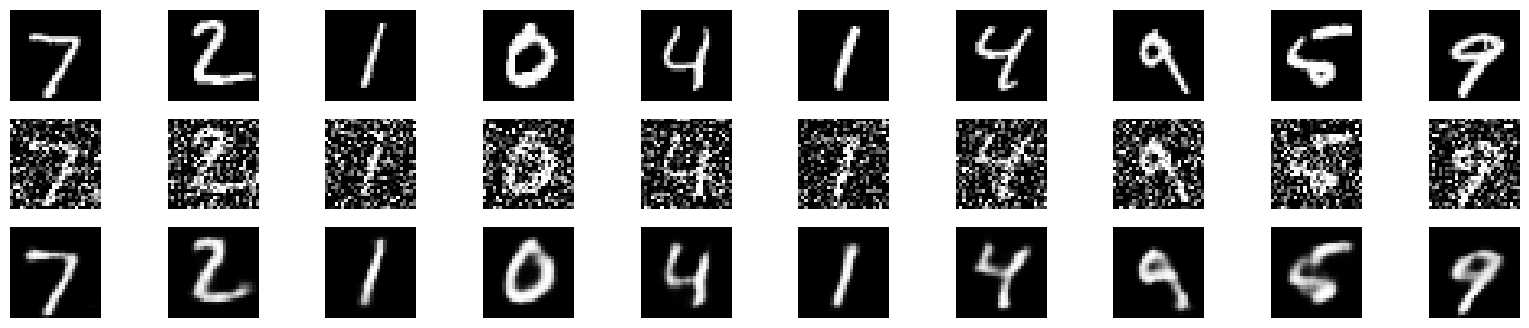

In [33]:
def display_images(xtestS, xtestN, decodeimg, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        for j, img in enumerate([xtestS,xtestN,decodeimg]):
            ax = plt.subplot(3, n, i + 1 + j * n)
            plt.imshow(img[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
    plt.show()
display_images(xtestS, xtestN, decodeimg)